# **[CODE] LSTM**

## 1. Cài đặt thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Input
from keras.models import Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Load dữ liệu và tiền xử lý

In [2]:
# Đọc dữ liệu
data = pd.read_csv('DL_TongHop.csv')  # Thay 'du_lieu.csv' bằng tên file của bạn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Thang         36 non-null     object 
 1   SoLuong       36 non-null     int64  
 2   SoLuongDT     34 non-null     float64
 3   TienKM        36 non-null     int64  
 4   CongTrinhXD   36 non-null     float64
 5   CPI           36 non-null     float64
 6   XuatKhau      36 non-null     int64  
 7   NhapKhau      36 non-null     int64  
 8   SxCongNghiep  36 non-null     float64
 9   FDIDangKy     36 non-null     float64
 10  FDIGiaiNgan   36 non-null     float64
 11  BanLe         36 non-null     float64
dtypes: float64(7), int64(4), object(1)
memory usage: 3.5+ KB


In [3]:
data.head(5)

,Thang,SoLuong,SoLuongDT,TienKM,CongTrinhXD,CPI,XuatKhau,NhapKhau,SxCongNghiep,FDIDangKy,FDIGiaiNgan,BanLe
0,2021-01,265547,1769949.0,3299284590,1291.666667,0.06,27700,26400,-3.3,2.02,1.51,479944.0
1,2021-02,213284,754632.0,2889266796,1291.666667,1.52,20000,20800,-21.1,3.44,0.99,439656.0
2,2021-03,638919,2520689.0,3373950838,1291.666667,-0.27,28600,28200,22.1,4.67,1.60,405124.0
3,2021-04,284667,2971660.0,1912420176,1291.666667,-0.04,25500,27000,1.1,2.12,1.40,409419.0
4,2021-05,533791,5048883.0,2374964929,1291.666667,0.16,26000,28000,1.6,1.75,1.65,393554.0


In [4]:
data = data.interpolate(method='spline', order=1, axis=0, limit_direction='both', inplace=False)

In [5]:
data.set_index('Thang', inplace=True)
data

,SoLuong,SoLuongDT,TienKM,CongTrinhXD,CPI,XuatKhau,NhapKhau,SxCongNghiep,FDIDangKy,FDIGiaiNgan,BanLe
Thang,,,,,,,,,,,
2021-01,265547,1.769949e+06,3299284590,1291.666667,0.06,27700,26400,-3.3,2.02,1.51,479944.0
2021-02,213284,7.546320e+05,2889266796,1291.666667,1.52,20000,20800,-21.1,3.44,0.99,439656.0
2021-03,638919,2.520689e+06,3373950838,1291.666667,-0.27,28600,28200,22.1,4.67,1.60,405124.0
2021-04,284667,2.971660e+06,1912420176,1291.666667,-0.04,25500,27000,1.1,2.12,1.40,409419.0
2021-05,533791,5.048883e+06,2374964929,1291.666667,0.16,26000,28000,1.6,1.75,1.65,393554.0
2021-06,439071,3.139075e+06,2568408214,1291.666667,0.17,26500,27500,0.5,1.27,2.09,381858.0
2021-07,182430,1.563633e+06,1243641843,648.833333,0.62,27000,28700,1.8,1.43,1.26,339362.0
2021-08,126141,2.117116e+06,1126535338,648.833333,0.25,26200,27500,-4.2,2.40,1.08,279843.0
2021-09,239520,1.184596e+06,1283259376,648.833333,-0.62,27000,26500,5.0,3.05,1.70,308802.0


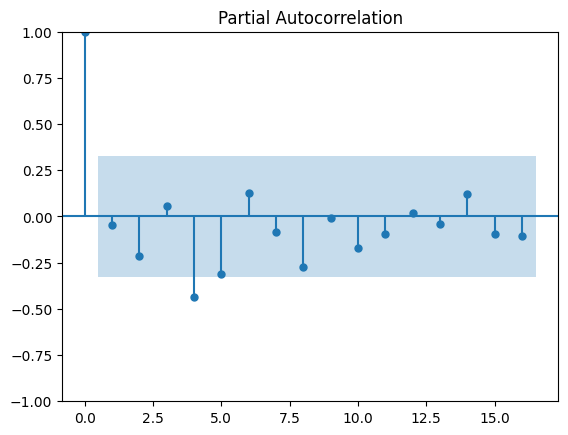

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Giả sử `data` là chuỗi thời gian của bạn
plot_pacf(data[['SoLuong']], lags=16)
plt.show()

## 4. Xây dựng hàm mô hình LSTM

Dự báo 3 tháng

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import time

# Hàm tính toán các độ đo
def calculate_metrics(true_values, forecast_values):
    mse = np.mean((true_values - forecast_values) ** 2)  # Mean Squared Error
    mae = np.mean(np.abs(true_values - forecast_values))  # Mean Absolute Error
    rmse = np.sqrt(mse) 
    mape = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100  # Mean Absolute Percentage Error
    return mse, mae, rmse, mape

def print_metrics(true_values, forecast_values):
    mse, mae, rmse, mape = calculate_metrics(true_values, forecast_values)
    print(f'MSE: {np.round(mse)}, MAE: {np.round(mae)}, RMSE: {np.round(rmse)}, MAPE: {np.round(mape, 5)}%')

def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

def forecast_lstm3(data):
    
    # Split data into train and test sets
    train_size = int(len(data) * 0.8)  
    train, test = data.iloc[:train_size], data.iloc[train_size:]

    # Scale data
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)

    # Create X and Y
    look_back = 5
    train_X, train_Y = create_dataset(train_scaled, look_back)
    test_X, test_Y = create_dataset(test_scaled, look_back)

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(128, input_shape=(look_back, train_X.shape[2]), return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(train_Y.shape[1]))  # Changed to adapt to multiple output dimensions if needed

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train model
    start = time.time()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(train_X, train_Y, epochs=100, batch_size=3, validation_split=0.1, callbacks=[early_stopping], verbose=1)
    end = time.time()

    # Make predictions
    test_predict = model.predict(test_X)
    print(test_predict)

    # Invert predictions
    test_predict = scaler.inverse_transform(test_predict)
    predict_values = test_predict[:, 0]
    print(predict_values)
    test_Y = scaler.inverse_transform(test_Y)
    test_values = test_Y[:, 0]
    print(test_values)
    
    print_metrics(test_values, predict_values)

In [8]:
data1 = data[['SoLuong','CPI','XuatKhau','NhapKhau','SxCongNghiep','FDIDangKy','FDIGiaiNgan','BanLe']]
data2 = data[['SoLuong','SoLuongDT','TienKM','CongTrinhXD','CPI','XuatKhau','NhapKhau','SxCongNghiep','FDIDangKy','FDIGiaiNgan','BanLe']]


In [9]:
forecast_lstm3(data2)

Epoch 1/100
7/7 [==============================] - 4s 146ms/step - loss: 0.9513 - val_loss: 0.9667
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.8499 - val_loss: 0.9249
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7747 - val_loss: 0.8740
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7012 - val_loss: 0.8193
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6420 - val_loss: 0.7684
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5817 - val_loss: 0.7318
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5073 - val_loss: 0.7035
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4715 - val_loss: 0.6813
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4236 - val_loss: 0.6765
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.3855 - val_loss: 0.6567
Epoch 11/100
7/7 [

Dự báo 6 tháng

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import time

# Hàm tính toán các độ đo
def calculate_metrics(true_values, forecast_values):
    mse = np.mean((true_values - forecast_values) ** 2)  # Mean Squared Error
    mae = np.mean(np.abs(true_values - forecast_values))  # Mean Absolute Error
    rmse = np.sqrt(mse) 
    mape = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100  # Mean Absolute Percentage Error
    return mse, mae, rmse, mape

def print_metrics(true_values, forecast_values):
    mse, mae, rmse, mape = calculate_metrics(true_values, forecast_values)
    print(f'MSE: {np.round(mse)}, MAE: {np.round(mae)}, RMSE: {np.round(rmse)}, MAPE: {np.round(mape, 5)}%')

def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

def forecast_lstm6(data):
    
    # Split data into train and test sets
    train_size = int(len(data) * 0.8)  
    train, test = data.iloc[:train_size], data.iloc[train_size:]

    # Scale data
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)

    # Create X and Y
    look_back = 2
    train_X, train_Y = create_dataset(train_scaled, look_back)
    test_X, test_Y = create_dataset(test_scaled, look_back)

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(128, input_shape=(look_back, train_X.shape[2]), return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(train_Y.shape[1]))  # Changed to adapt to multiple output dimensions if needed

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train model
    start = time.time()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(train_X, train_Y, epochs=100, batch_size=3, validation_split=0.1, callbacks=[early_stopping], verbose=1)
    end = time.time()

    # Make predictions
    test_predict = model.predict(test_X)
    print(test_predict)

    # Invert predictions
    test_predict = scaler.inverse_transform(test_predict)
    predict_values = test_predict[:, 0]
    print(predict_values)
    test_Y = scaler.inverse_transform(test_Y)
    test_values = test_Y[:, 0]
    print(test_values)
    
    print_metrics(test_values, predict_values)

In [11]:
forecast_lstm6(data2)

Epoch 1/100
8/8 [==============================] - 4s 100ms/step - loss: 0.9285 - val_loss: 1.0120
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.8870 - val_loss: 0.9972
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.8501 - val_loss: 0.9787
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7989 - val_loss: 0.9611
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7412 - val_loss: 0.9382
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6901 - val_loss: 0.9092
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6436 - val_loss: 0.8880
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6024 - val_loss: 0.8649
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5398 - val_loss: 0.8519
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4980 - val_loss: 0.8576
Epoch 11/100
8/8 [=========